# Climate Segmentation Scaling Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 16
plt.rcParams['lines.markersize'] = 14
plt.rcParams['lines.linewidth'] = 2

In [4]:
data = pd.read_csv('scaling_results_002.txt', delim_whitespace=True)

In [5]:
data

,n_workers,train_time,n_steps,batch_size,peak_flops,sust_flops
0,1,471.389,32,1,1.210,0.978
1,2,469.251,32,2,2.480,1.965
2,4,480.188,32,4,4.798,3.841
3,8,480.625,32,8,9.736,7.676
4,16,475.056,32,16,20.107,15.531
5,32,476.322,32,32,39.469,30.980
6,64,480.778,32,64,79.648,61.385
7,128,393.263,24,128,151.951,112.568
8,256,405.616,24,256,315.109,285.445
9,512,415.019,24,512,616.033,566.222


In [6]:
# Compute throughputs
train_throughput = data.n_steps * data.batch_size / data.train_time
data = data.assign(train_throughput=train_throughput)

In [7]:
data.sust_flops.loc[0]

0.978

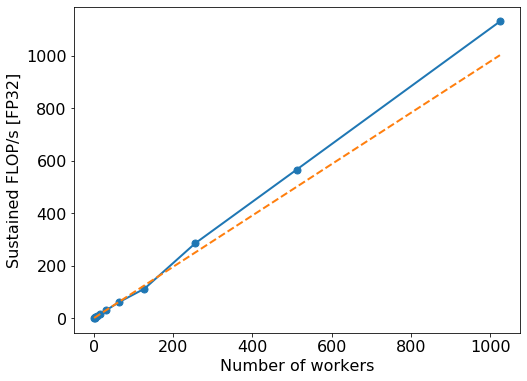

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(data.n_workers, data.sust_flops, '.-')

# Ideal scaling
plt.plot(data.n_workers, data.n_workers * data.sust_flops.loc[0], '--')

plt.xlabel('Number of workers')
plt.ylabel('Sustained TFLOP/s [FP32]');

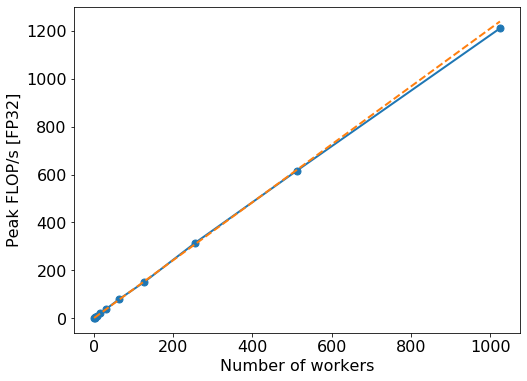

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(data.n_workers, data.peak_flops, '.-')

# Ideal scaling
plt.plot(data.n_workers, data.n_workers * data.peak_flops.loc[0], '--')

plt.xlabel('Number of workers')
plt.ylabel('Peak TFLOP/s [FP32]');

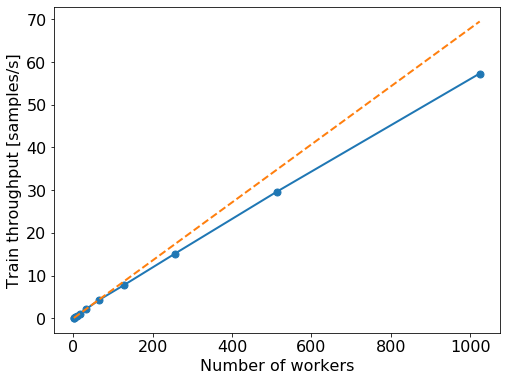

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(data.n_workers, data.train_throughput, '.-')

# Ideal scaling
plt.plot(data.n_workers, data.n_workers * data.train_throughput.loc[0], '--')

plt.xlabel('Number of workers')
plt.ylabel('Train throughput [samples/s]');

In [11]:
scaling_eff = data.train_throughput / (data.n_workers * data.train_throughput.loc[0])

In [12]:
scaling_eff

0     1.000000
1     1.004556
2     0.981676
3     0.980783
4     0.992281
5     0.989644
6     0.980471
7     0.898996
8     0.871617
9     0.851869
10    0.824628
dtype: float64